### モジュールインポート

In [1]:
import csv
import requests
import bs4
import re
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum
import derby_func as func
import collections

### 定数宣言

In [2]:
RACE = "/race/"
CSV_DIR = "csv"
URL_BASE = "https://db.netkeiba.com"
URL_RACE = "https://race.netkeiba.com/race/shutuba.html?race_id="

RACE_TABLE_NAME = "race_table_01 nk_tb_common"

In [8]:
TRAIN_HORSE_DATA_PATH = CSV_DIR + "/horse/"
TEST_RACE_ID = "202105030411"
TRAIN_RACE_ID = func.get_train_race_id(func.get_text_from_page('https://race.netkeiba.com/special/index.html?id=0065'))
RACE_DATA_COLUMNS = func.race_data_columns()
HORSE_DATA_COLUMNS = func.horse_data_columns()
RACE_RANK = func.race_rank()

In [4]:
TRAIN_RACE_ID

['202005030411',
 '201905030411',
 '201805030411',
 '201705030411',
 '201605030411',
 '201505030411',
 '201405030411',
 '201305030411',
 '201205030411',
 '201105030811',
 '201005030811',
 '200905030811',
 '200805030811',
 '200705030811',
 '200605030811',
 '200505030811',
 '200405030811',
 '200305020811',
 '200205040811',
 '200105030811',
 '200005030811']

### レースデータ取得

In [5]:
def correct_train_data(race_id):
    url = URL_BASE + RACE + race_id
    text = func.get_text_from_page(url)
    race_name = func.get_name_from_text(text).replace('競馬データベース - netkeiba.com', '').split('｜')
    if not os.path.exists(CSV_DIR + "/horse/" + race_id[0:4] + race_name[0]):
        os.makedirs(CSV_DIR + "/horse/" + race_id[0:4] + race_name[0])
    if not os.path.exists(CSV_DIR + RACE + race_name[0]):
        os.makedirs(CSV_DIR + RACE + race_name[0])
    (info, horse_id, horse_names) = func.get_old_race_info_from_text(False, text, RACE_TABLE_NAME, race_id, race_name[0])
    file_path = CSV_DIR+ RACE + race_name[0] + "/" + race_id[0:4] + ".csv"
    with open(file_path, "w", newline="", encoding='shift_jis') as f:
        writer = csv.writer(f)
        writer.writerows(info)

In [6]:
for i in range(len(TRAIN_RACE_ID)):
    correct_train_data(TRAIN_RACE_ID[i])
    time.sleep(3) # サーバーへの負荷を考慮してディレイを入れる。

ダイワキャグニー
ソーグリッタリング
トーラスジェミニ
アンドラステ
アトミックフォース
サトノアーサー
ピースワンパラディ
ゴーフォザサミット
サトノガーネット
レイエンダ
ギベオン
マイネルファンロン
サラキア
アイスストーム
マイネルハニー
シャドウディーヴァ
インビジブルレイズ
エメラルファイト
レイエンダ
サラキア
ソーグリッタリング
ショウナンバッハ
ブレスジャーニー
プロディガルサン
アンノートル
ストーンウェア
カラビナ
ミッキースワロー
ハクサンルドルフ
ダノンキングダム
アップクォーク
ソウルスターリング
サトノアーサー
ハクサンルドルフ
グリュイエール
サーブルオール
エアアンセム
ベルキャニオン
ゴールドサーベラス
バーディーイーグル
マイネルフロスト
ブラックスピネル
マイネルミラノ
スマートオーディン
トーセンマタコイヤ
ダイワキャグニー
アデイインザライフ
シャイニープリンス
ダッシングブレイズ
アストラエンブレム
マイネルハニー
クラリティシチー
バーディーイーグル
タイセイサミット
マイネルミラノ
デンコウアンジュ
フルーキー
ナスノセイカン
ベルーフ
ヒストリカル
カムフィー
メドウラーク
クラリティスカイ
レッドレイヴン
トーセンレーヴ
パドルウィール
ルージュバック
フルーキー
マイネルミラノ
ロジチャリス
レコンダイト
ヒストリカル
アルバートドック
サトノギャラント
ラングレー
エキストラエンド
ショウナンバッハ
アルマディヴァン
メイショウヤタロウ
エックスマーク
ダービーフィズ
ステラウインド
ナカヤマナイト
マイネルホウオウ
エイシンヒカリ
サトノアラジン
ディサイファ
フルーキー
ヒラボクディープ
ペルーサ
フェスティヴタロー
ユールシンギング
アーデント
フルアクセル
マイネルホウオウ
ノーステア
ゲシュタルト
ディサイファ
マイネルラクリマ
ダークシャドウ
タマモベストプレイ
ダノンヨーヨー
マジェスティハーツ
タムロスカイ
カネトシディオス
トーセンジャガー
ゴールデンナンバー
レインスティック
カルドブレッサ
シルクアーネスト
アーデント
ペルーサ
フェスティヴタロー
パドトロワ
クラレント
ジャスタウェイ
サンレイレーザー
リルダヴァル
ファイナルフォーム
サクラアルディート
サトノアポロ
シルクアーネス

In [9]:
if __name__ == '__main__':
    url = URL_RACE + TEST_RACE_ID
    text = func.get_text_from_page(url)
    race_name = func.get_name_from_text(text).replace(' - netkeiba.com', '').split('(')
    if not os.path.exists(CSV_DIR + "/horse/" + TEST_RACE_ID[0:4] + race_name[0]):
        os.makedirs(CSV_DIR + "/horse/" + TEST_RACE_ID[0:4] + race_name[0])
    (info, horse_id, horse_names) = func.get_race_info_from_text(text, "Shutuba_Table RaceTable01 ShutubaTable", TEST_RACE_ID[0:4], race_name[0])
    file_path = CSV_DIR+ RACE + TEST_RACE_ID[0:4] + race_name[0] + ".csv"
    with open(file_path, "w", newline="", encoding='shift_jis') as f:
        writer = csv.writer(f)
        writer.writerows(info)

プレシャスブルー
マイラプソディ
ヴェロックス
セダブリランテス
エアアルマス
ヒュミドール
ファルコニア
アルジャンナ
ヤシャマル
ワンダープチュック
ニシノデイジー
ミラアイトーン
サトノフラッグ
ガロアクリーク
ザダル
シュリ
アドマイヤビルゴ
アトミックフォース


In [10]:
RACE_NAME = race_name[0]
TRAIN_RACE_DATA_PATH = CSV_DIR+ RACE + RACE_NAME + "/"

### DataFrame読み込み、前処理

In [12]:
df_races = []
db_horses = {}
for i in range(len(TRAIN_RACE_ID)):
    df_races.append(pd.read_csv(TRAIN_RACE_DATA_PATH + str(int(TRAIN_RACE_ID[len(TRAIN_RACE_ID) - 1][:4]) + i) + ".csv", header=None, names = RACE_DATA_COLUMNS, encoding='shift_jis'))

In [13]:
def race_score_define(row):
    rank_score = 0
    for rank in RACE_RANK:
        if (rank.rank in row['race_name']):
            rank_score = rank.score
    return rank_score

In [14]:
def road_horse_data(row, num):
    road_path = TRAIN_HORSE_DATA_PATH + str(int(TRAIN_RACE_ID[len(TRAIN_RACE_ID) - 1][:4]) + num) + RACE_NAME + "/" + row['horse_name'] + ".csv"
    path = str(int(TRAIN_RACE_ID[len(TRAIN_RACE_ID) - 1][:4]) + num) + row['horse_name']
    df_tmp = pd.read_csv(road_path, header=None, names = HORSE_DATA_COLUMNS, encoding='shift_jis')
    df_tmp = df_tmp.drop(columns=['time_score', "ground_score", 'popularity', 'odds', 'R', 'winner', 'reward', "video" ,"coment", "coment_2",])
    df_tmp.dropna(how='all', axis = 1, inplace=True)
    df_tmp['ground_type'] = df_tmp.apply(lambda x: x['distance'][:1], axis = 1)
    df_tmp['distance'] = df_tmp.apply(lambda x: x['distance'][1:], axis = 1)
    df_tmp['race_rank_score'] = df_tmp.apply(race_score_define, axis = 1)
    df_tmp.dropna(how='any', axis = 0, inplace=True)
    db_horses[path] = df_tmp.reset_index()
    return path

In [15]:
def serch_past_races(row, num):
    df_horse = db_horses[row['horse_data_key']]
    df_horse['race_date_judge'] = df_horse.apply(lambda x: True if str(x['race_id']) == str(TRAIN_RACE_ID[len(TRAIN_RACE_ID) - 1 - num]) else False, axis = 1)
    index = df_horse[df_horse['race_date_judge'] == True].index
    df_horse = df_horse.iloc[index[0] + 1:]
    db_horses[row['horse_data_key']] = df_horse
    if (df_horse.shape[0] > 0):
        return index[0]
    else :
        return 0

In [16]:
def rank_to_int(df):
    df_2 = df.copy()
    df_2 = df_2[(df_2['rank'] != "取") & (df_2['rank'] != "中") & (df_2['rank'] != "除")]
    df_2['rank'] = df_2['rank'].apply(lambda x: int(re.sub(r"\D", "", str(x))))
    return df_2

In [17]:
def calc_past_rank_ave(row):
    df_horse = db_horses[row['horse_data_key']]
    df_horse = rank_to_int(df_horse)
    df_horse['race_score'] = df_horse.apply(lambda x: 0 if x['rank'] > 5 else (x['race_rank_score'] * (4 - x['rank']) * 10) / x['head_count'], axis = 1)
    mean = df_horse['rank'].mean(axis = 0)
    db_horses[row['horse_data_key']] = df_horse
    return mean

In [18]:
df_races_2 = df_races.copy()
drop_columns = ['trainer', 'owner', 'jockey', 'reward', 'difference', 'lap_time', 'final_3F', 'time', 'time_score']
for i in range(len(df_races_2)):
    df_races_2[i].fillna({'time_score': '**'})
    df_races_2[i].dropna(how='all', axis = 1, inplace=True)
    df_races_2[i] = rank_to_int(df_races_2[i])
    df_races_2[i] = df_races_2[i].drop(columns = drop_columns, errors = 'ignore')
    df_races_2[i]['horse_data_key'] = df_races_2[i].apply(road_horse_data, num = i, axis = 1)
    df_races_2[i]['race_count'] = df_races_2[i].apply(serch_past_races, num = i, axis = 1)
    df_races_2[i] = df_races_2[i][df_races_2[i]['race_count'] > 0]
    df_races_2[i]['past_rank_ave'] = df_races_2[i].apply(calc_past_rank_ave, axis = 1)
    df_races_2[i]['past_rank_med'] = df_races_2[i].apply(lambda x: db_horses[x['horse_data_key']]['rank'].median(axis = 0), axis = 1)
    df_races_2[i]['before_race_rank'] = df_races_2[i].apply(lambda x: int(db_horses[x['horse_data_key']]['rank'][x['race_count'] + 1]), axis = 1)
    df_races_2[i]['past_rank_std'] = df_races_2[i].apply(lambda x: db_horses[x['horse_data_key']]['rank'].std(axis = 0), axis = 1)
    df_races_2[i]['max_pred_rank'] = df_races_2[i].apply(lambda x: 1 if (x['past_rank_ave'] + x['past_rank_std']) < 5 else 0, axis = 1)
    df_races_2[i]['ave_race_score'] = df_races_2[i].apply(lambda x: db_horses[x['horse_data_key']]['race_score'].median(axis = 0), axis = 1)
df_races_2[20].head(5)

,rank,frame_number,horse_number,horse_name,aptitude_course,aptitude_distance,aptitude_run,aptitude_growth,aptitude_ground,age,...,popularity,horse_weight,horse_data_key,race_count,past_rank_ave,past_rank_med,before_race_rank,past_rank_std,max_pred_rank,ave_race_score
0,1,3,6,ダイワキャグニー,95,58,85,39,65,牡6,...,9,500(-16),2020ダイワキャグニー,6,5.73913,4.0,14,4.873093,0,0.000000
1,2,1,1,ソーグリッタリング,116,87,116,116,87,牡6,...,5,486(+8),2020ソーグリッタリング,3,3.12000,2.0,2,2.521904,0,17.647059
2,3,8,18,トーラスジェミニ,116,58,116,58,96,牡4,...,18,478(-4),2020トーラスジェミニ,11,6.50000,6.5,11,4.366539,0,0.000000
3,4,8,16,アンドラステ,116,29,87,58,101,牝4,...,4,466(0),2020アンドラステ,3,1.50000,1.0,1,0.836660,1,36.666667
4,5,6,11,アトミックフォース,116,58,116,116,58,牡4,...,8,476(-2),2020アトミックフォース,5,4.00000,2.0,2,3.234430,0,7.878788


### レースの特徴表示

In [19]:
df_all_races = pd.concat(df_races_2)
len(df_all_races)

339

In [20]:
df_all_races_rank = []
df_all_races_rank.append(df_all_races[df_all_races['rank'] == 1])
df_all_races_rank.append(df_all_races[df_all_races['rank'] <= 3])
df_all_races_rank.append(df_all_races)

In [21]:
def plot_count_columns(column_name, _bins = 20, _range = (0, 20)):
    title = ["Rank1", "InTicket", "All"]
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(df_all_races_rank)):
        plt.subplot(len(df_all_races_rank), 3, i+1)
        plt.title(title[i] + "_" + column_name)
        plt.hist(df_all_races_rank[i][column_name], bins=_bins, range = _range)
        plt.tight_layout()
        print(title[i] + "：サンプル数" + str(len(df_all_races_rank[i])))

過去20年で1着及び馬券内だった馬の枠番

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


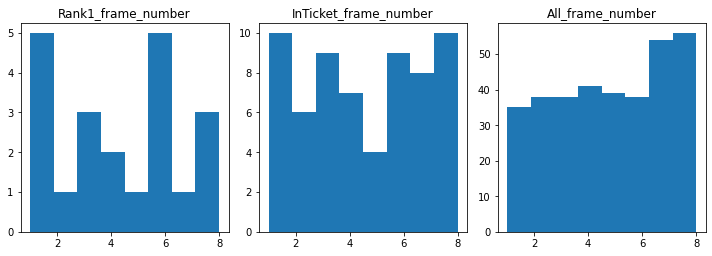

In [22]:
plot_count_columns('frame_number', 8, (1, 8))

過去20年で1着及び馬券内だった馬の芝適性

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


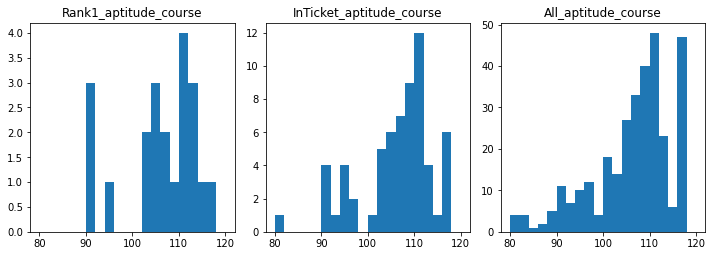

In [23]:
plot_count_columns("aptitude_course", _range = (80, 120))

過去20年で1着及び馬券内だった馬の距離適性(高いほど短距離得意)

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


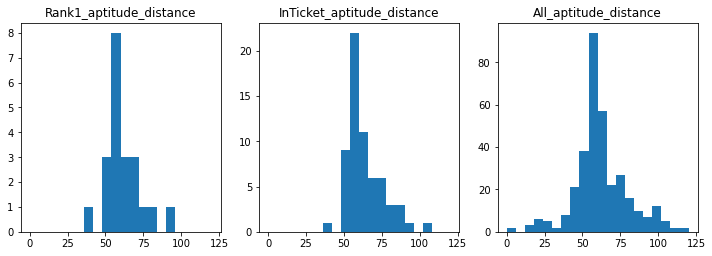

In [24]:
plot_count_columns("aptitude_distance", _range = (0, 120))

過去20年で1着及び馬券内だった馬の脚質適性(高いほど逃げ)

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


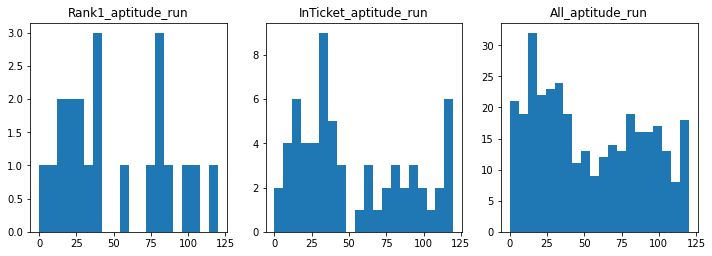

In [25]:
plot_count_columns("aptitude_run", _range = (0, 120))

過去20年で1着及び馬券内だった馬の成長適性(高いほど早熟)

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


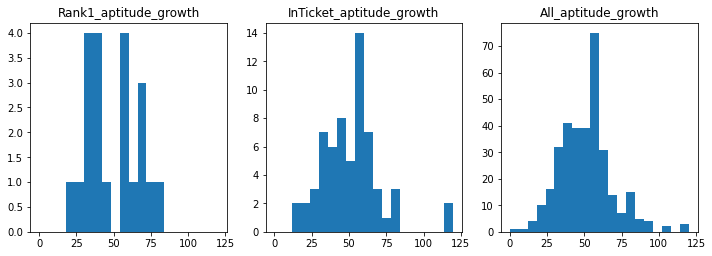

In [26]:
plot_count_columns("aptitude_growth", _range = (0, 120))

過去20年で1着及び馬券内だった馬の馬場適性(高いほど重馬場得意)

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


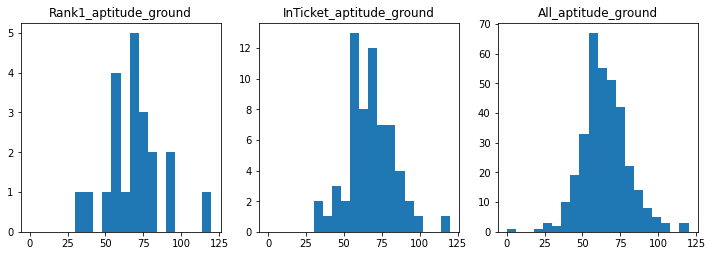

In [27]:
plot_count_columns("aptitude_ground", _range = (0, 120))

過去20年で1着及び馬券内だった馬の過去レース順位平均値

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


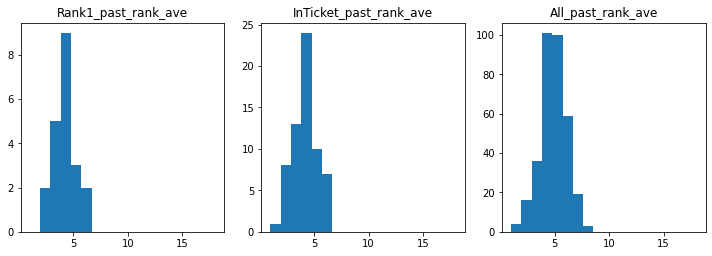

In [28]:
plot_count_columns("past_rank_ave", 18,_range = (1, 18))

過去20年で1着及び馬券内だった馬の過去レース順位中央値

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


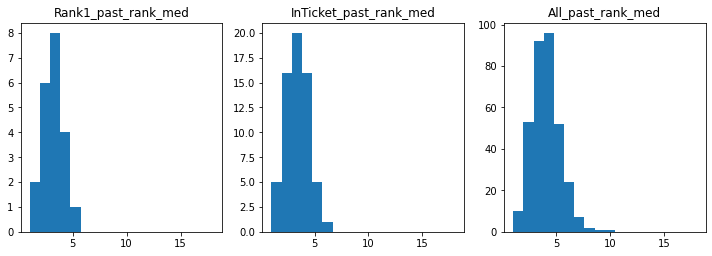

In [29]:
plot_count_columns("past_rank_med", 18,_range = (1, 18))

過去20年で1着及び馬券内だった馬の前走着順

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


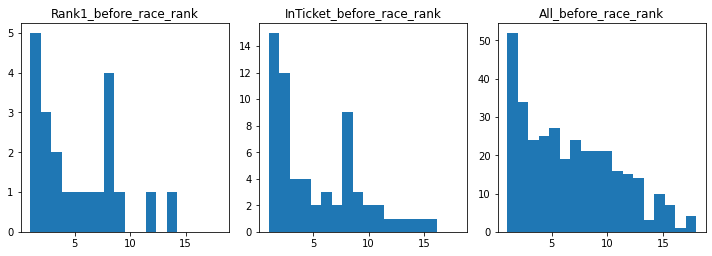

In [30]:
plot_count_columns("before_race_rank", 18,_range = (1, 18))

過去レースの平均+標準偏差が5より大きければ1, 小さければ0

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


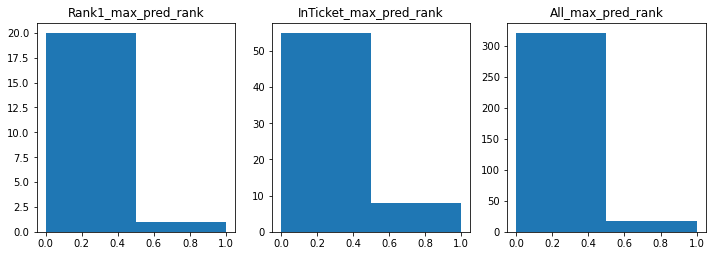

In [31]:
plot_count_columns("max_pred_rank", 2,_range = (0, 1))

過去レースの順位データに(G1)などのレースの格を数値化して計算した平均を算出

Rank1：サンプル数21
InTicket：サンプル数63
All：サンプル数339


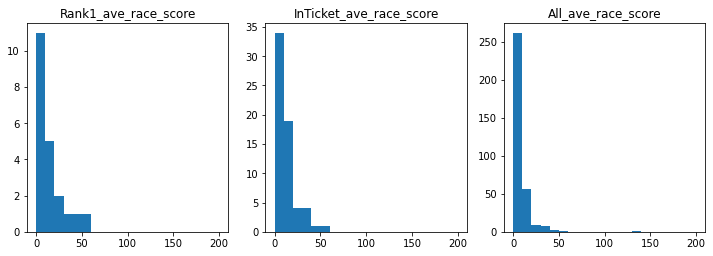

In [32]:
plot_count_columns("ave_race_score", _range = (0, 200))

### 特徴量抽出

In [33]:
df_races_train = []
df_races_test = []
df_races_all = pd.concat(df_races_2)
for i in range(len(df_races_2)):
    tmp = []
    for j in range(len(df_races_2)):
        if (i == j):
            df_races_test.append(df_races_2[j])
        else:
            tmp.append(df_races_2[j])
    df_races_train.append(pd.concat(tmp))

In [34]:
df_races_train_2 = df_races_train.copy()
df_races_test_2 = df_races_test.copy()
df_races_all_2 = df_races_all.copy()
y_trains = []
(df_races_all_2, y_all) = func.create_param(df_races_all_2)
for i in range(len(df_races_train_2)):
    (df_races_train_2[i], df_races_test_2[i], tmp) = func.create_params(df_races_train_2[i], df_races_test_2[i])
    y_trains.append(tmp)

### 2000～2019までのデータで2020年のレースを予測してみて正答率を確認する

In [35]:
TEST_NUM = 20

In [36]:
df_races_test_2[TEST_NUM].head(1)

,frame_number,aptitude_course,aptitude_distance,aptitude_run,aptitude_growth,aptitude_ground,race_count,past_rank_ave,past_rank_med,before_race_rank,max_pred_rank,ave_race_score
0,3,95,58,85,39,65,6,5.73913,4.0,14,0,0.0


In [37]:
y_train = y_trains[TEST_NUM]

In [38]:
X_train = df_races_train_2[TEST_NUM].values.astype(np.float)
X_train.shape

(321, 12)

In [39]:
X_test = df_races_test_2[TEST_NUM].values.astype(np.float)
X_test.shape

(18, 12)

In [40]:
n_train = y_train.shape[0]
n_train

321

### 機械学習開始

In [41]:
# 機械学習のモデルを読み込む
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

# 機械学習のお役立ちモジュールを読み込む
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn import preprocessing

In [42]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits = n_folds, shuffle = shuffle).split(X, y)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

5つの学習モデルで正答率比較　(Dump Classifierはすべての入力に0を返すモデル)

In [43]:
print('Passive Aggressive Classifier: {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:  {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, svm.SVC))))
print('Random Forest Classifier:      {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.3f}'.format(metrics.accuracy_score(y_train, stratified_cv(X_train, y_train, neighbors.KNeighborsClassifier))))
print('Dump Classifier: {:.3f}'.format(metrics.accuracy_score(y_train, [0 for ii in y_train.tolist()])))

Passive Aggressive Classifier: 0.723
Gradient Boosting Classifier:  0.782
Support vector machine(SVM):   0.813
Random Forest Classifier:      0.791
K Nearest Neighbor Classifier: 0.760
Dump Classifier: 0.813


### 正答率の高かったモデルが予測時に何を重要視したかを出力

In [44]:
# linear_model.PassiveAggressiveClassifier()
# ensemble.GradientBoostingClassifier()
# svm.SVC()
# ensemble.RandomForestClassifier()
# neighbors.KNeighborsClassifier()

model = ensemble.RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

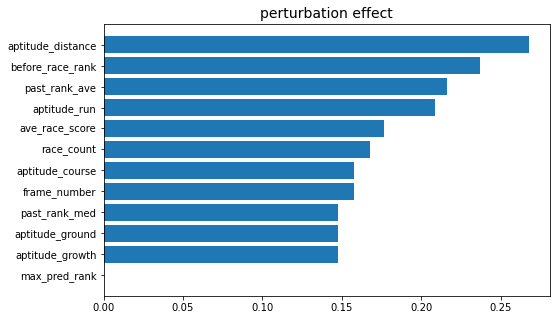

past_rank_ave, perturbation effect: 13.18%
aptitude_distance, perturbation effect: 12.15%
before_race_rank, perturbation effect: 11.41%
aptitude_growth, perturbation effect: 8.84%
ave_race_score, perturbation effect: 8.84%
aptitude_growth, perturbation effect: 8.33%
ave_race_score, perturbation effect: 7.80%
aptitude_run, perturbation effect: 7.80%
frame_number, perturbation effect: 7.22%
past_rank_med, perturbation effect: 7.22%
frame_number, perturbation effect: 7.22%
past_rank_med, perturbation effect: 0.00%


In [45]:
func.plot_importance(func.calc_importance(model, X_train), df_races_test_2[0].columns.values)
func.print_importance(func.calc_importance(model, X_train), df_races_test_2[0].columns.values)

予測結果出力

In [46]:
y_pred = model.predict(X_test)
print(y_pred)
for i in range(len(y_pred)):
    if (y_pred[i]):
        print(df_races_2[TEST_NUM].iloc[[i]]['horse_name'])

[0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
1    ソーグリッタリング
Name: horse_name, dtype: object
5    サトノアーサー
Name: horse_name, dtype: object
6    ピースワンパラディ
Name: horse_name, dtype: object


### 今年のレースを予測

In [47]:
PRED_RACE_COLUMNS = [
    "frame_number",
    "horse_number",
    "mark",
    "horse_name",
    "url",
    "aptitude_course",
    "aptitude_distance",
    "aptitude_run",
    "aptitude_growth",
    "aptitude_ground",
    "age",
    "weight",
    "jockey",
    "trainer",
    "blank_1",
    "blank_2",
    "blank_3",
    "blank_4",
    "blank_5"
]

In [48]:
df_pred_race = pd.read_csv(CSV_DIR+ RACE + str(int(TRAIN_RACE_ID[0][:4]) + 1) + RACE_NAME + ".csv", header=None, names = PRED_RACE_COLUMNS, encoding='shift_jis')

In [49]:
num = int(TRAIN_RACE_ID[0][:4]) + 1 - 2000
df_pred_race.head(5)

,frame_number,horse_number,mark,horse_name,url,aptitude_course,aptitude_distance,aptitude_run,aptitude_growth,aptitude_ground,age,weight,jockey,trainer,blank_1,blank_2,blank_3,blank_4,blank_5
0,1,1,--◎◯▲△☆&#10003消,プレシャスブルー,https://db.netkeiba.com/horse/2014100063,116,58,1,1,116,牡7,56.0,柴田善,美浦相沢,442(+6),---.-,**,NaN,NaN
1,1,2,--◎◯▲△☆&#10003消,マイラプソディ,https://db.netkeiba.com/horse/2017105434,116,24,10,47,85,牡4,56.0,武豊,栗東友道,510(+2),---.-,**,NaN,NaN
2,2,3,--◎◯▲△☆&#10003消,ヴェロックス,https://db.netkeiba.com/horse/2016104529,116,48,90,52,83,牡5,57.0,浜中,栗東中内田,494(-4),---.-,**,NaN,NaN
3,2,4,--◎◯▲△☆&#10003消,セダブリランテス,https://db.netkeiba.com/horse/2014105949,88,49,77,43,62,牡7,56.0,石川,美浦手塚,518(0),---.-,**,NaN,NaN
4,3,5,--◎◯▲△☆&#10003消,エアアルマス,https://db.netkeiba.com/horse/2015110086,11,96,82,58,58,牡6,58.0,三浦,栗東池添学,488(+6),---.-,**,NaN,NaN


In [50]:
df_pred_race_2 = df_pred_race.copy()
drop_columns = ['trainer', 'owner', 'jockey', 'mark', 'url', 'blank_1', 'blank_2', 'blank_3', 'blank_4', 'blank_5']
df_pred_race_2.fillna({'time_score': '**'})
df_pred_race_2.dropna(how='all', axis = 1, inplace=True)
df_pred_race_2 = df_pred_race_2.drop(columns = drop_columns, errors = 'ignore')
df_pred_race_2['horse_data_key'] = df_pred_race_2.apply(road_horse_data, num = num, axis = 1)
df_pred_race_2['race_count'] = df_pred_race_2.apply(lambda x: int(db_horses[x['horse_data_key']].shape[0]), axis = 1)
df_pred_race_2['past_rank_ave'] = df_pred_race_2.apply(calc_past_rank_ave, axis = 1)
df_pred_race_2['past_rank_med'] = df_pred_race_2.apply(lambda x: db_horses[x['horse_data_key']]['rank'].median(axis = 0), axis = 1)
df_pred_race_2['before_race_rank'] = df_pred_race_2.apply(lambda x: int(db_horses[x['horse_data_key']]['rank'][x['race_count'] - 1]), axis = 1)
df_pred_race_2['past_rank_std'] = df_pred_race_2.apply(lambda x: db_horses[x['horse_data_key']]['rank'].std(axis = 0), axis = 1)
df_pred_race_2['max_pred_rank'] = df_pred_race_2.apply(lambda x: 1 if (x['past_rank_ave'] + x['past_rank_std']) < 5 else 0, axis = 1)
df_pred_race_2['ave_race_score'] = df_pred_race_2.apply(lambda x: db_horses[x['horse_data_key']]['race_score'].median(axis = 0), axis = 1)

In [51]:
df_pred_race_2.head(5)

,frame_number,horse_number,horse_name,aptitude_course,aptitude_distance,aptitude_run,aptitude_growth,aptitude_ground,age,weight,horse_data_key,race_count,past_rank_ave,past_rank_med,before_race_rank,past_rank_std,max_pred_rank,ave_race_score
0,1,1,プレシャスブルー,116,58,1,1,116,牡7,56.0,2021プレシャスブルー,34,5.147059,4.0,3,3.734624,0,0.000000
1,1,2,マイラプソディ,116,24,10,47,85,牡4,56.0,2021マイラプソディ,9,6.000000,4.0,1,6.103278,0,0.000000
2,2,3,ヴェロックス,116,48,90,52,83,牡5,57.0,2021ヴェロックス,13,3.692308,3.0,1,2.982857,0,55.555556
3,2,4,セダブリランテス,88,49,77,43,62,牡7,56.0,2021セダブリランテス,8,2.625000,1.0,1,2.503569,0,35.511364
4,3,5,エアアルマス,11,96,82,58,58,牡6,58.0,2021エアアルマス,20,4.100000,2.5,2,3.582119,0,7.142857


In [52]:
df_pred_race_3 = df_pred_race_2.copy()
df_pred_race_3 = df_pred_race_3.drop(columns = ["horse_name", "age", "weight", "horse_data_key", "horse_number", "past_rank_std"])
df_pred_race_3.head(1)

,frame_number,aptitude_course,aptitude_distance,aptitude_run,aptitude_growth,aptitude_ground,race_count,past_rank_ave,past_rank_med,before_race_rank,max_pred_rank,ave_race_score
0,1,116,58,1,1,116,34,5.147059,4.0,3,0,0.0


In [53]:
df_pred_race_3.shape
x_pred = df_pred_race_3.values.astype(np.float)

In [54]:
X_all = df_races_all_2.values.astype(np.float)

In [55]:
horse_names = df_pred_race_2['horse_name']
models = []
models.append(linear_model.PassiveAggressiveClassifier())
models.append(ensemble.GradientBoostingClassifier())
models.append(svm.SVC())
models.append(ensemble.RandomForestClassifier())
models.append(neighbors.KNeighborsClassifier())
names = []
for i in range(len(models)):
    models[i].fit(X_all, y_all)
    y_pred = models[i].predict(x_pred)
    print(y_pred)
    for j in range(len(y_pred)):
        if (y_pred[j]):
            names.append(horse_names[j])
print(collections.Counter(names))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Counter({'プレシャスブルー': 1, 'シュリ': 1, 'ザダル': 1})
